### Target:
    
    - Add image augmentations random rotation and random perspective.

### Results:

    - Model has 7979 parameters.

    - Train Accuracy = 98.69

    - Test Accuracy = 99.53

### Analysis:

    - Crossed 99.4 for first time and test loss is fluctuating.
    
    - Time to add an LR scheduler to stabilise test loss.
    

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [ ]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-7.0, 7.0), fill=(0,)),
    transforms.RandomPerspective(0.3, 0.5, fill=(0,)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [ ]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from model import Model5 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model5                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 9, 28, 28]           81                          1.02%
│    └─Dropout: 2-2                      [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─ReLU: 2-3                         [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─BatchNorm2d: 2-4                  [32, 9, 28, 28]           [32, 9, 28, 28]           18                          0.23%
│    └─Conv2d: 2-5                       [32, 9, 28, 28]           [32, 10, 28, 28]          810               

In [ ]:
from utils import train, test

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.1200 Batch_id=1874 Average Loss=0.2377 Accuracy=92.65: 100%|██████████| 1875/1875 [00:55<00:00, 33.65it/s]


Test set: Average loss: 0.0563, Accuracy: 9821/10000 (98.21%)

Epoch 2


Train: Batch Loss=0.1259 Batch_id=1874 Average Loss=0.0991 Accuracy=96.98: 100%|██████████| 1875/1875 [00:47<00:00, 39.53it/s]


Test set: Average loss: 0.0439, Accuracy: 9864/10000 (98.64%)

Epoch 3


Train: Batch Loss=0.0431 Batch_id=1874 Average Loss=0.0808 Accuracy=97.46: 100%|██████████| 1875/1875 [00:48<00:00, 38.82it/s]


Test set: Average loss: 0.0345, Accuracy: 9889/10000 (98.89%)

Epoch 4


Train: Batch Loss=0.0682 Batch_id=1874 Average Loss=0.0699 Accuracy=97.84: 100%|██████████| 1875/1875 [00:47<00:00, 39.72it/s]


Test set: Average loss: 0.0303, Accuracy: 9905/10000 (99.05%)

Epoch 5


Train: Batch Loss=0.0033 Batch_id=1874 Average Loss=0.0674 Accuracy=97.85: 100%|██████████| 1875/1875 [00:47<00:00, 39.74it/s]


Test set: Average loss: 0.0278, Accuracy: 9900/10000 (99.00%)

Epoch 6


Train: Batch Loss=0.0111 Batch_id=1874 Average Loss=0.0620 Accuracy=98.11: 100%|██████████| 1875/1875 [00:48<00:00, 38.98it/s]


Test set: Average loss: 0.0296, Accuracy: 9896/10000 (98.96%)

Epoch 7


Train: Batch Loss=0.0785 Batch_id=1874 Average Loss=0.0584 Accuracy=98.25: 100%|██████████| 1875/1875 [00:47<00:00, 39.86it/s]


Test set: Average loss: 0.0268, Accuracy: 9916/10000 (99.16%)

Epoch 8


Train: Batch Loss=0.0212 Batch_id=1874 Average Loss=0.0551 Accuracy=98.30: 100%|██████████| 1875/1875 [00:46<00:00, 40.15it/s]


Test set: Average loss: 0.0268, Accuracy: 9911/10000 (99.11%)

Epoch 9


Train: Batch Loss=0.0117 Batch_id=1874 Average Loss=0.0556 Accuracy=98.31: 100%|██████████| 1875/1875 [00:46<00:00, 39.90it/s]


Test set: Average loss: 0.0231, Accuracy: 9926/10000 (99.26%)

Epoch 10


Train: Batch Loss=0.0149 Batch_id=1874 Average Loss=0.0526 Accuracy=98.37: 100%|██████████| 1875/1875 [00:50<00:00, 37.37it/s]


Test set: Average loss: 0.0255, Accuracy: 9919/10000 (99.19%)

Epoch 11


Train: Batch Loss=0.0015 Batch_id=1874 Average Loss=0.0492 Accuracy=98.42: 100%|██████████| 1875/1875 [00:49<00:00, 37.68it/s]


Test set: Average loss: 0.0217, Accuracy: 9935/10000 (99.35%)

Epoch 12


Train: Batch Loss=0.0077 Batch_id=1874 Average Loss=0.0494 Accuracy=98.45: 100%|██████████| 1875/1875 [00:48<00:00, 38.63it/s]


Test set: Average loss: 0.0233, Accuracy: 9926/10000 (99.26%)

Epoch 13


Train: Batch Loss=0.0089 Batch_id=1874 Average Loss=0.0480 Accuracy=98.49: 100%|██████████| 1875/1875 [00:47<00:00, 39.24it/s]


Test set: Average loss: 0.0244, Accuracy: 9926/10000 (99.26%)

Epoch 14


Train: Batch Loss=0.0547 Batch_id=1874 Average Loss=0.0455 Accuracy=98.62: 100%|██████████| 1875/1875 [00:47<00:00, 39.70it/s]


Test set: Average loss: 0.0180, Accuracy: 9953/10000 (99.53%)

Epoch 15


Train: Batch Loss=0.1241 Batch_id=1874 Average Loss=0.0434 Accuracy=98.69: 100%|██████████| 1875/1875 [00:48<00:00, 39.03it/s]


Test set: Average loss: 0.0248, Accuracy: 9919/10000 (99.19%)



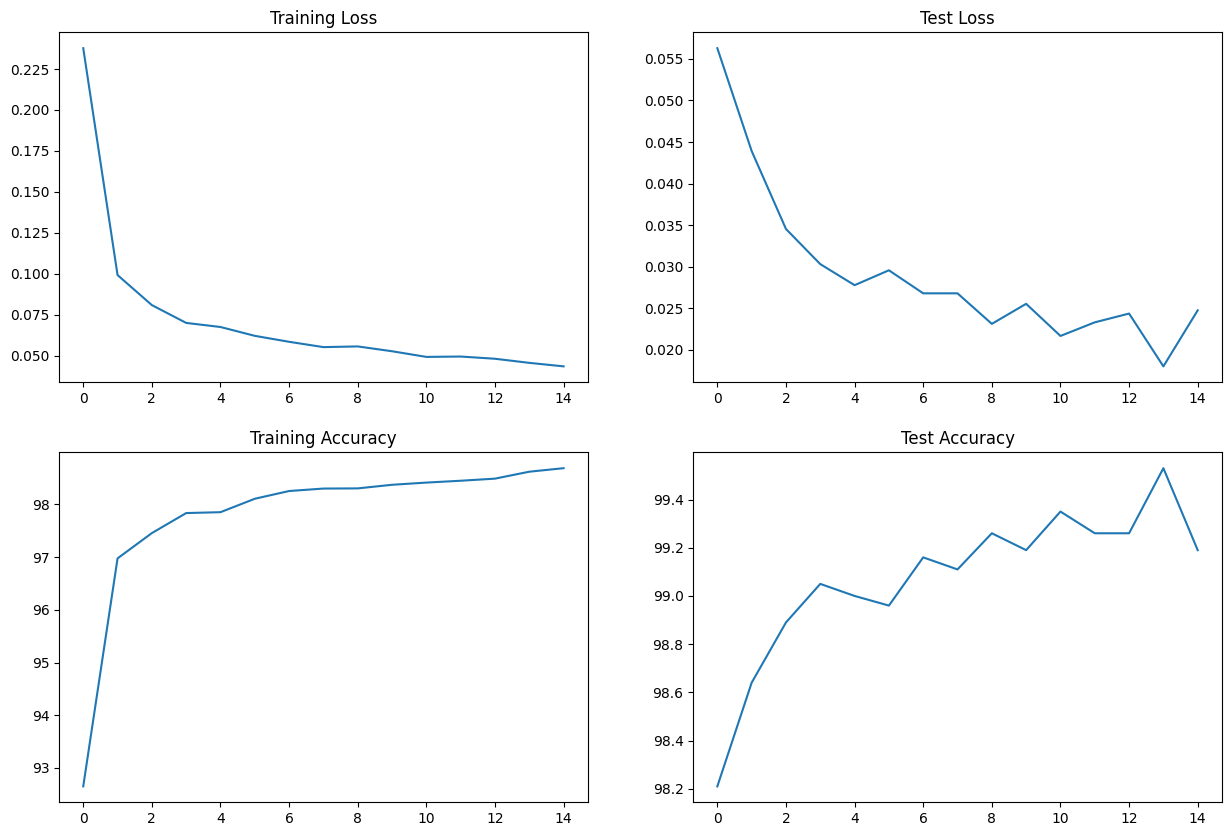

In [ ]:
from utils import plot_stats
plot_stats()

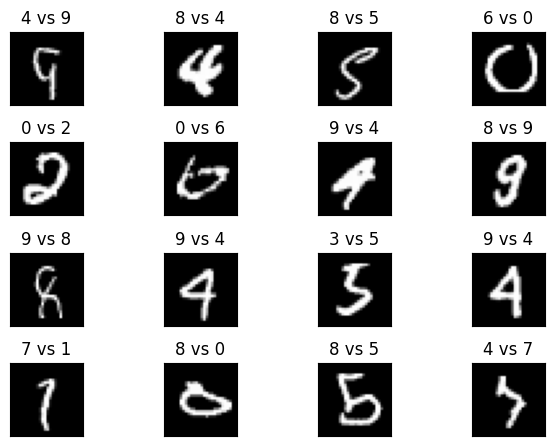

In [ ]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual